# РК1
### Студент: Торжков Максим Сергеевия
### Группа: ИУ5-21М
### Номер по списку группы (вариант): 16

#### Вариант задачи №1 - 16

Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием преобразования Бокса-Кокса (Box-Cox transformation).

#### Вариант задачи №2 - 36

Для набора данных проведите процедуру отбора признаков (feature selection). Используйте класс SelectKBest для 5 лучших признаков, и метод, основанный на взаимной информации.

#### Дополнительное задание (по группам)
Для пары произвольных колонок данных построить график "Диаграмма рассеяния".


##Импортирование необходимых библиотек

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
%matplotlib inline 
sns.set(style="ticks")
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Задача 1 (№16)
Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием преобразования Бокса-Кокса (Box-Cox transformation).

Произведем загрузку данных и выведем распределения признаков

In [35]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [36]:
data = pd.read_csv("./WineQT.csv", sep=",")

In [37]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [38]:
data = data.drop('Id', 1)
data.head() 

<ipython-input-38-226370be4029>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('Id', 1)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


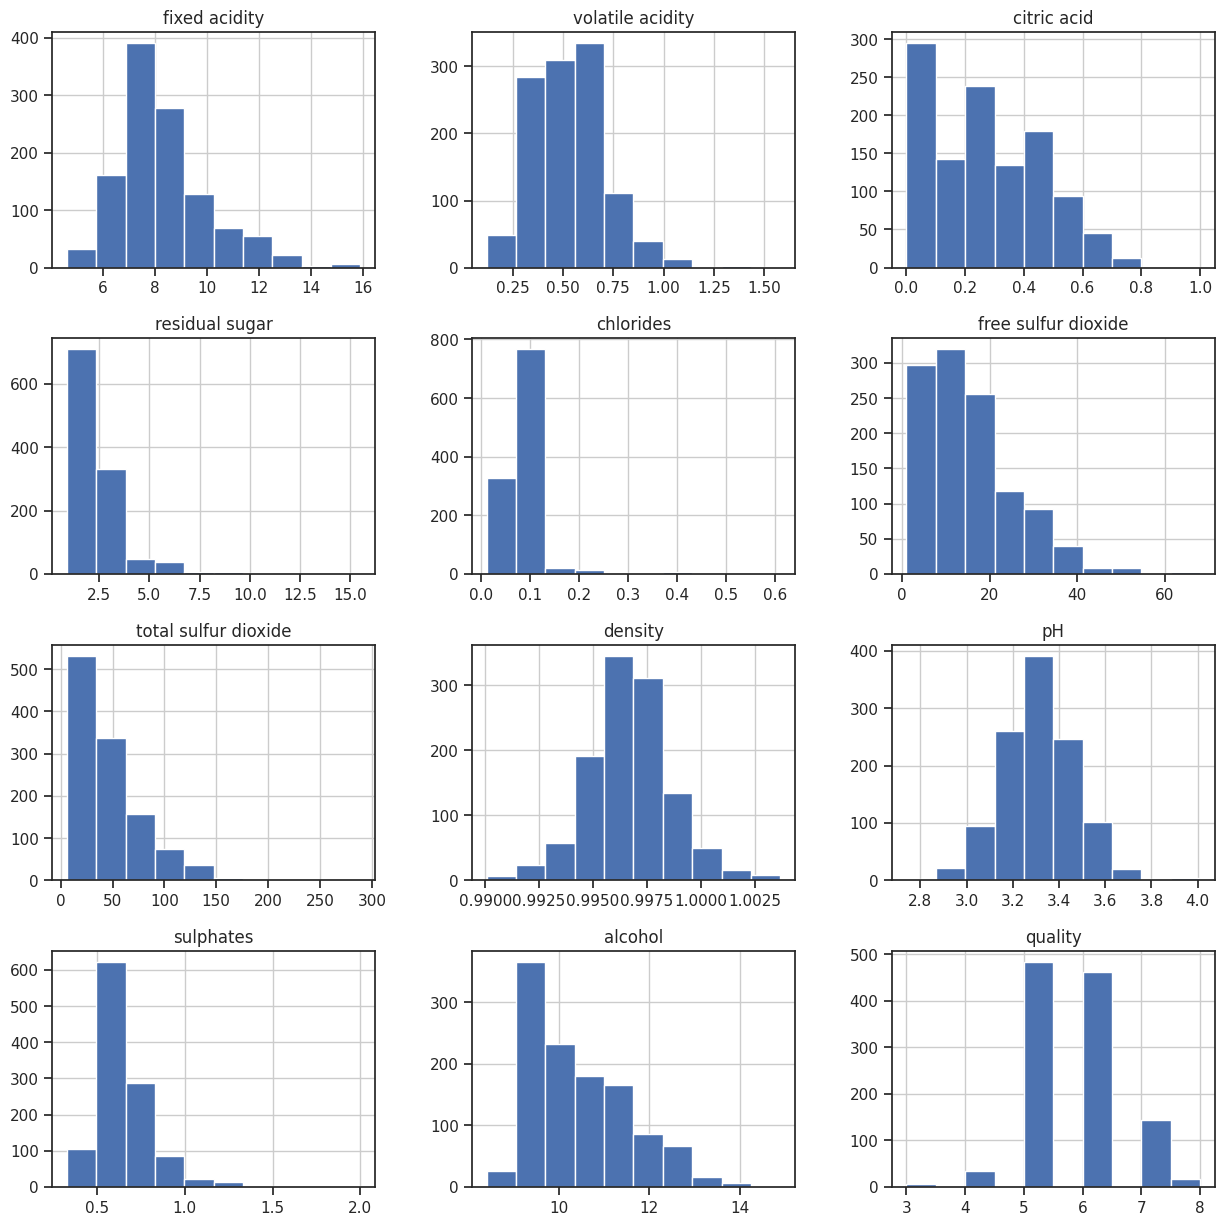

In [39]:
data.hist(figsize=(15,15))
plt.show()

###Исходное распределение 
Как видно, оно несколько отличается от нормального распределения

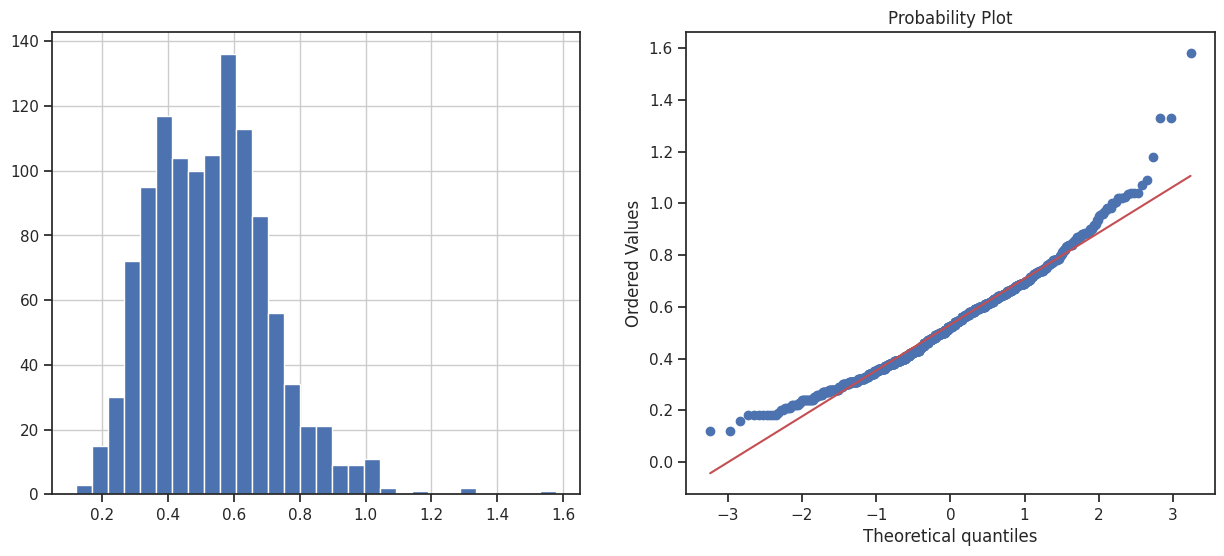

In [40]:
diagnostic_plots(data, 'volatile acidity')

Побробуем провести нормализацию с использованием преобразования Бокса-Кокса (Box-Cox transformation).

Оптимальное значение λ = 0.4044579651653099


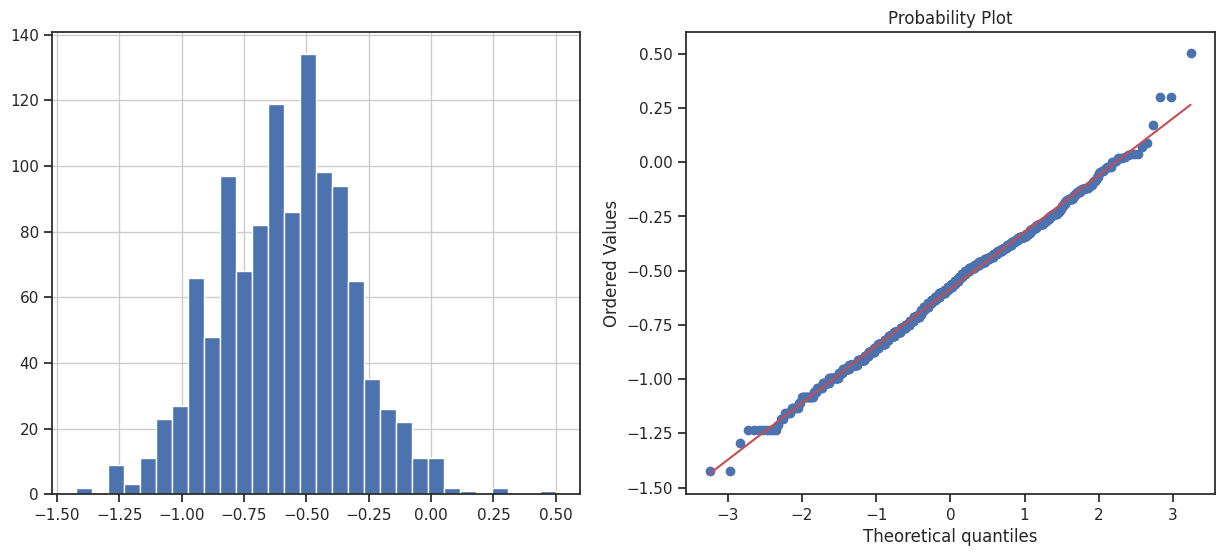

In [41]:
data['volatile acidity_bc'], param = stats.boxcox(data['volatile acidity']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'volatile acidity_bc')

Исходя из полученного графика, видно, что с помощью преобразования Бокса-Кокса удалось успешно нормализовать признак "volatile acidity" (летучая кислотность)

## Задача 2 (№36)
Для набора данных проведите процедуру отбора признаков (feature selection). Используйте класс SelectKBest для 5 лучших признаков, и метод, основанный на взаимной информации.

Подготовим *DataFrame* на основе нашего набора данных из "Задания №1"

In [42]:
wine_X = data.drop('quality', 1).values
wine_y= data['quality'].values
wine_feature_names = list(data.drop('quality', 1).keys())
wine_x_df = pd.DataFrame(data=wine_X, columns=wine_feature_names)

<ipython-input-42-87290fe64f6d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  wine_X = data.drop('quality', 1).values
<ipython-input-42-87290fe64f6d>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  wine_feature_names = list(data.drop('quality', 1).keys())


Используем метод, основанный на взаимной информации

Text(0, 0.5, 'Взаимная информация')

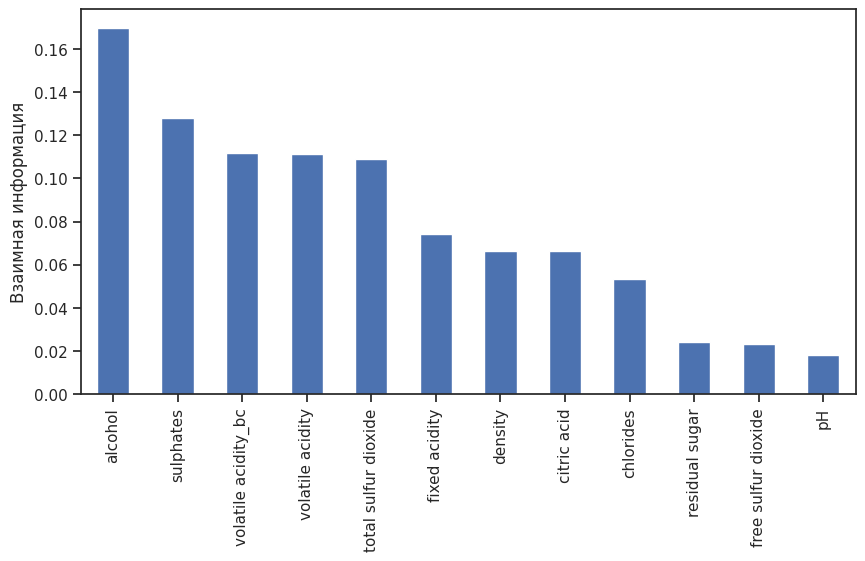

In [43]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

mi = mutual_info_regression(wine_X, wine_y)
mi = pd.Series(mi)
mi.index = wine_feature_names
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')

Используем класс SelectKBest для 5 лучших признаков

In [44]:
from sklearn.feature_selection import SelectKBest

sel_mi = SelectKBest(mutual_info_regression, k=5).fit(wine_X, wine_y)

list(zip(wine_feature_names, sel_mi.get_support()))

[('fixed acidity', False),
 ('volatile acidity', True),
 ('citric acid', False),
 ('residual sugar', False),
 ('chlorides', False),
 ('free sulfur dioxide', False),
 ('total sulfur dioxide', True),
 ('density', False),
 ('pH', False),
 ('sulphates', True),
 ('alcohol', True),
 ('volatile acidity_bc', True)]

"Хорошими" и важными признакамии являются только признаки с флагом True. Остальные можно отбросить для дальнейшей работы

## Дополнительное задание
Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

<Axes: xlabel='density', ylabel='alcohol'>

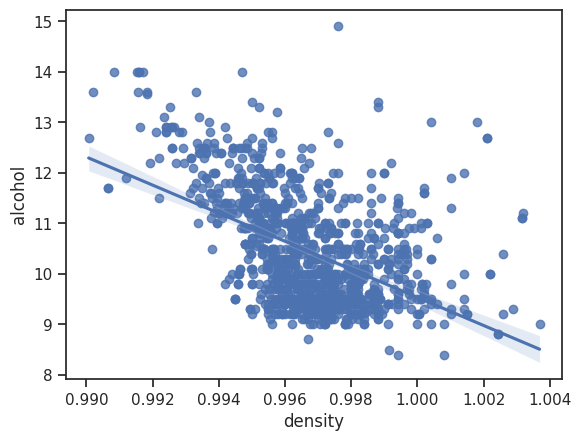

In [45]:
sns.regplot(x=data['density'], y=data['alcohol'])

Построили график рассеяния, показыающий зависимость между двумя признаками: *alcohol* (крепость вина) и *density* (плотность напитка)